# Download ERA5 data 

In [55]:
import os
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

# change path if necessary
os.chdir("/content/drive/MyDrive/enseignement /UE_ML_2021_2022/TPac")
os.getcwd()

from IPython.display import HTML
from IPython.display import display
import os 
!pip install cdsapi
!pip install netCDF4
import api_func
import datetime
import pandas as pd
import numpy as np

Mounted at /content/drive/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Pre-requirements


In order to download ERA5 data using an API, you will have to get a UDI and a personal key. To get those, you will have to register to the Copernicus platform using the following link : https://cds.climate.copernicus.eu/user/login
<br>Enter/copy paste your UDI and your key in the cells below

In [56]:
udi = '165042'
key = '868fa005-b5dc-4471-a8c2-862ac1bdd509'

Below you can add a filename after your variable names (eg, `filename = 'ERA5'` will give you __u10_ERA5__).
<br>
By default, files will be downloaded in your home directory, in the subdirectory __api__ , but you can change it through the variable __path__ (otherwise let default value `path = 'None'`).

In [57]:
filename = 'ERA5'
path = '/content/drive/MyDrive/enseignement /UE_ML_2021_2022/TPac' # None

## Variable, time period and geographical location

ERA5 provides hourly estimates for a large number of ocean-wave and atmospheric variables (see list [here](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview)). Variable names must be formatted with lowercase first letters, and composed words spaced by underscores (eg, Sea surface temperature in `'sea_surface_temperature'`, 10m u-component of wind in `'10m_u_component_of_wind'`). Use the alias `'all'` to select all available months, days or hours, otherwise set one or several elements as a list (eg, `'days = ['01','02']'`).

In [58]:
# CHOOSE WHICH SINGLE LEVELS TO DOWNLOAD IN data
variables = ['10m_u_component_of_wind', '10m_v_component_of_wind', 'total_precipitation','mean_wave_direction','sea_surface_temperature'] 

years = ['2014'] 

months = ['01']
#Or set one or several months as a list
# ['01','02','03','04','05','06','07','08','09','10','11','12']

days = ['01','02']
#Or set one or several days as a list
# ['01', '02', 03','04','05','06','07','08','09','10','11','12','13','14','15','16','17',
                   #'18','19','20','21','22','23','24','25','26','27','28','29','30','31']

hours = 'all'
#Or set one or several hours as a list
#['00:00','01:00','02:00','03:00','04:00', '05:00','06:00','07:00','08:00',
                     #'09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00',
                     #'20:00','21:00','22:00','23:00']

# Boundaries of the geographical area in decimal degrees
north_boundary = 10#90
south_boundary = 10#-90
east_boundary = -10#180
west_boundary = -10#-180

## Print summary and run download

In [59]:
api_func.make_cds_file(key, udi, path)

print('You have selected : \n')
sel = [print(variables) for data in variables]
print('\nfor the following times')
print(f'Years : {years} \n Months : {months} \n Days : {days} \n Hours : {hours}')

print('\nYour boundaries are : North {}°, South {}°, East {}°, West {}°'.format(north_boundary, south_boundary,
                                                                         east_boundary, west_boundary))

You have selected : 

['10m_u_component_of_wind', '10m_v_component_of_wind', 'total_precipitation', 'mean_wave_direction', 'sea_surface_temperature']
['10m_u_component_of_wind', '10m_v_component_of_wind', 'total_precipitation', 'mean_wave_direction', 'sea_surface_temperature']
['10m_u_component_of_wind', '10m_v_component_of_wind', 'total_precipitation', 'mean_wave_direction', 'sea_surface_temperature']
['10m_u_component_of_wind', '10m_v_component_of_wind', 'total_precipitation', 'mean_wave_direction', 'sea_surface_temperature']
['10m_u_component_of_wind', '10m_v_component_of_wind', 'total_precipitation', 'mean_wave_direction', 'sea_surface_temperature']

for the following times
Years : ['2014'] 
 Months : ['01'] 
 Days : ['01', '02'] 
 Hours : all

Your boundaries are : North 10°, South 10°, East -10°, West -10°


In [60]:
df = api_func.final_creation(os.getcwd()+"/"+filename, filename, key, variables, years, months, days, hours, [north_boundary, west_boundary, south_boundary, east_boundary])

2023-03-18 09:13:26,387 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-03-18 09:13:26,390 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-03-18 09:13:26,567 INFO Request is queued
INFO:cdsapi:Request is queued
2023-03-18 09:21:47,345 INFO Request is completed
INFO:cdsapi:Request is completed
2023-03-18 09:21:47,349 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data7/adaptor.mars.internal-1679131297.1187682-29153-3-a9e7a98f-5e50-4cfe-8af0-2407ad4c1d6c.nc to ERA5.nc (2.7K)
INFO:cdsapi:Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data7/adaptor.mars.internal-1679131297.1187682-29153-3-a9e7a98f-5e50-4cfe-8af0-2407ad4c1d6c.nc to ERA5.nc (2.7K)
2023-03-18 09:21:48,984 INFO Download rate 1.6K/s
INFO:cdsapi:Download rate 1.6

Exception ignored in: <function NpzFile.__del__ at 0x7f725dea0550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/numpy/lib/npyio.py", line 213, in __del__
  File "/usr/local/lib/python3.9/dist-packages/numpy/lib/npyio.py", line 208, in close
OSError: [Errno 107] Transport endpoint is not connected


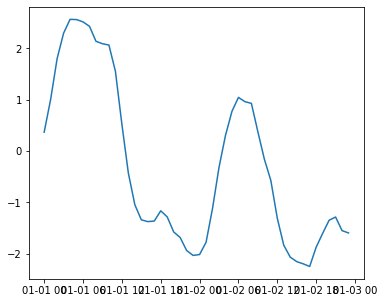

In [61]:
## Code to plot 2D image of one variable (here mwd) :

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

variable_name= 'u10'

if not os.path.exists(os.path.join(path,'api',variable_name+'_'+filename+'.npy')):
  print('no ERA data with this variable')
  sys.exit()

var1 = np.load(os.path.join(path,'api',variable_name+'_'+filename+'.npy'), allow_pickle=True)
stamps = np.load(os.path.join(path,'api','stamps.npz'), allow_pickle=True)

mat_lat, mat_lon = np.meshgrid(stamps['latitude'],stamps['longitude'])

fig = plt.figure(figsize=(6,5))
if var1.shape[1:]==(1,1):
  plt.plot(stamps['timestamps'],var1[:,0,0])
else:
  plt.pcolormesh(mat_lon,mat_lat, var1[0,:,:].T, cmap=cm.jet)
  plt.title('tp variable at time '+str(stamps['timestamps'][0]))
  plt.colorbar()
plt.show()